# Import library

In [280]:
#import library
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Get the Data

In [282]:
df = pd.read_csv('./Desktop/File/Skooldio-Essential-pandas-demo_and_practice/data/titanic.csv')

In [284]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [286]:
df.shape

(891, 12)

this dataset have 891 rows and 12 columns

## describe the columns

In [288]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [290]:
column_info = {
    'columns' : [
        'PassengerId', 
        'Survived', 
        'Pclass', 
        'Name', 
        'Sex', 
        'Age', 
        'SibSp',
        'Parch', 
        'Ticket', 
        'Fare', 
        'Cabin', 
        'Embarked'
    ],
    'Description' : [
        'Passenger ID',
        'survival -> 0 = No, 1 = Yes',
        'ticket class -> 1 = 1st, 2 = 2nd, 3 = 3rd',
        'Name of passenger',
        'male or female',
        'age of passenger',
        'number of siblings aboard on titanic',
        'number of parent/childern',
        'ticket number',
        'passenger fare',
        'cabin number',
        'port of embarkation'
    ]
    
}

column_info = pd.DataFrame(column_info)
column_info

,columns,Description
0,PassengerId,Passenger ID
1,Survived,"survival -> 0 = No, 1 = Yes"
2,Pclass,"ticket class -> 1 = 1st, 2 = 2nd, 3 = 3rd"
3,Name,Name of passenger
4,Sex,male or female
5,Age,age of passenger
6,SibSp,number of siblings aboard on titanic
7,Parch,number of parent/childern
8,Ticket,ticket number
9,Fare,passenger fare


## Convert Data type & Handle missing values

In [292]:
#auto convert data type
df = df.convert_dtypes()

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    Int64  
 1   Survived     891 non-null    Int64  
 2   Pclass       891 non-null    Int64  
 3   Name         891 non-null    string 
 4   Sex          891 non-null    string 
 5   Age          714 non-null    Float64
 6   SibSp        891 non-null    Int64  
 7   Parch        891 non-null    Int64  
 8   Ticket       891 non-null    string 
 9   Fare         891 non-null    Float64
 10  Cabin        204 non-null    string 
 11  Embarked     889 non-null    string 
dtypes: Float64(2), Int64(5), string(5)
memory usage: 89.8 KB


----

### impute 'age' column

Missing values in the 'Age' column should be imputed using the average age of passengers within the same Pclass.

In [296]:
#หาค่า median ของ age และ groupby Pclass
age_median = df.groupby('Pclass')['Age'].transform('median')

#นำค่า median นั้น มาแทนในค่าว่างของ Age
df['Age'].fillna(age_median, inplace = True)

/var/folders/lw/m69hrdsd0zx3n4cpnvv3hs840000gn/T/ipykernel_2485/2324013090.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(age_median, inplace = True)


In [298]:
#เช็คว่ายังเหลือค่าว่างหรือไม่
df['Age'].isna().value_counts(dropna= False)

Age
False    891
Name: count, dtype: int64

----

### impute 'Embarked' column

In [300]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,<NA>
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,<NA>


In [302]:
df['Embarked'].value_counts(dropna = False)

Embarked
S       644
C       168
Q        77
<NA>      2
Name: count, dtype: Int64

Based on the data, most passengers embarked from Southampton (S), so I assumed that these two passengers also embarked from Southampton.

In [304]:
df['Embarked'].fillna('S', inplace = True)

/var/folders/lw/m69hrdsd0zx3n4cpnvv3hs840000gn/T/ipykernel_2485/1144286666.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace = True)


In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    Int64  
 1   Survived     891 non-null    Int64  
 2   Pclass       891 non-null    Int64  
 3   Name         891 non-null    string 
 4   Sex          891 non-null    string 
 5   Age          891 non-null    Float64
 6   SibSp        891 non-null    Int64  
 7   Parch        891 non-null    Int64  
 8   Ticket       891 non-null    string 
 9   Fare         891 non-null    Float64
 10  Cabin        204 non-null    string 
 11  Embarked     891 non-null    string 
dtypes: Float64(2), Int64(5), string(5)
memory usage: 89.8 KB


----

### Drop 'Cabin' column

the 'Cabin' column contains too many missing values to extract meaningful information, I decided to drop the column from the dataset.

In [308]:
df.drop(columns = 'Cabin', inplace = True)

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    Int64  
 1   Survived     891 non-null    Int64  
 2   Pclass       891 non-null    Int64  
 3   Name         891 non-null    string 
 4   Sex          891 non-null    string 
 5   Age          891 non-null    Float64
 6   SibSp        891 non-null    Int64  
 7   Parch        891 non-null    Int64  
 8   Ticket       891 non-null    string 
 9   Fare         891 non-null    Float64
 10  Embarked     891 non-null    string 
dtypes: Float64(2), Int64(5), string(4)
memory usage: 82.8 KB


----

### Convert to Catagory Type

In [312]:
df = df.astype({
    'Survived' : 'category',
    'Sex' : 'category'
})

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    Int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    Int64   
 3   Name         891 non-null    string  
 4   Sex          891 non-null    category
 5   Age          891 non-null    Float64 
 6   SibSp        891 non-null    Int64   
 7   Parch        891 non-null    Int64   
 8   Ticket       891 non-null    string  
 9   Fare         891 non-null    Float64 
 10  Embarked     891 non-null    string  
dtypes: Float64(2), Int64(4), category(2), string(3)
memory usage: 70.0 KB


----

## Convert 'Sex' to int

In [316]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [318]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [320]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.925,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.05,S


In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    Int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    Int64   
 3   Name         891 non-null    string  
 4   Sex          891 non-null    category
 5   Age          891 non-null    Float64 
 6   SibSp        891 non-null    Int64   
 7   Parch        891 non-null    Int64   
 8   Ticket       891 non-null    string  
 9   Fare         891 non-null    Float64 
 10  Embarked     891 non-null    string  
dtypes: Float64(2), Int64(4), category(2), string(3)
memory usage: 70.0 KB


---

## convert type to int

In [324]:
df[['Age','Fare','Survived','Sex']] = df[['Age','Fare','Survived','Sex']].astype(int)

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    Int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    Int64 
 3   Name         891 non-null    string
 4   Sex          891 non-null    int64 
 5   Age          891 non-null    int64 
 6   SibSp        891 non-null    Int64 
 7   Parch        891 non-null    Int64 
 8   Ticket       891 non-null    string
 9   Fare         891 non-null    int64 
 10  Embarked     891 non-null    string
dtypes: Int64(4), int64(4), string(3)
memory usage: 80.2 KB


---

## Create new columns

create column -> 'family size' -> SibSp + Parch + 1

In [328]:
df['fam_size'] = df['SibSp'] + df['Parch'] + 1

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,fam_size
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8,S,1


---

create column 'is_alone' 1 is alone, 0 is not alone

In [330]:
df['is_alone'] = (df['fam_size'] == 1).astype(int)

In [332]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,fam_size,is_alone
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53,S,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8,S,1,1


In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    Int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    Int64 
 3   Name         891 non-null    string
 4   Sex          891 non-null    int64 
 5   Age          891 non-null    int64 
 6   SibSp        891 non-null    Int64 
 7   Parch        891 non-null    Int64 
 8   Ticket       891 non-null    string
 9   Fare         891 non-null    int64 
 10  Embarked     891 non-null    string
 11  fam_size     891 non-null    Int64 
 12  is_alone     891 non-null    int64 
dtypes: Int64(5), int64(5), string(3)
memory usage: 95.0 KB


---

## Visualizetion

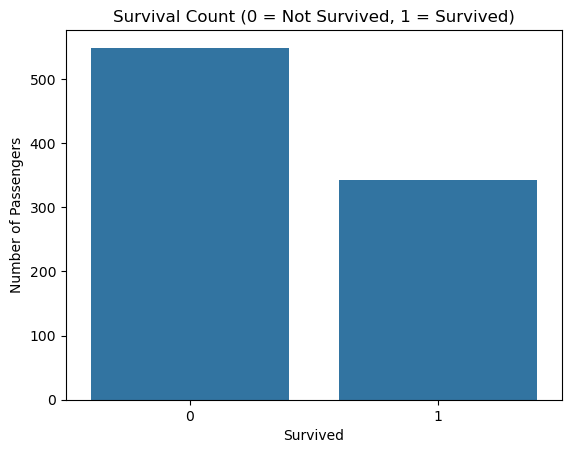

In [336]:
sns.countplot(data=df, x="Survived")
plt.title("Survival Count (0 = Not Survived, 1 = Survived)")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
plt.show()

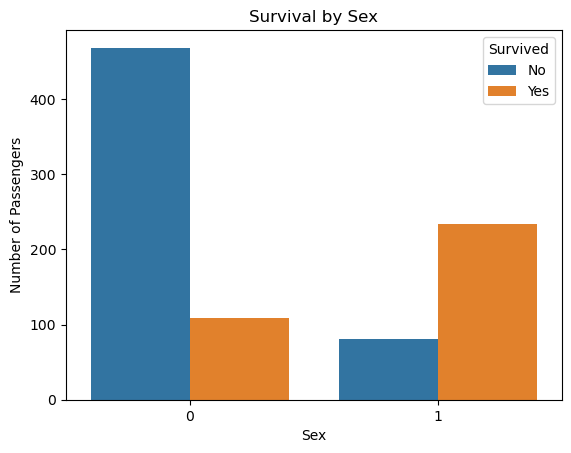

In [338]:
sns.countplot(data=df, x="Sex", hue="Survived")
plt.title("Survival by Sex")
plt.xlabel("Sex")
plt.ylabel("Number of Passengers")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

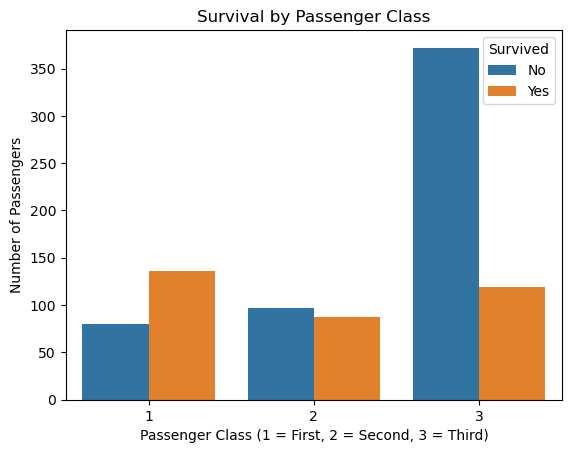

In [340]:
sns.countplot(data=df, x="Pclass", hue="Survived")
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class (1 = First, 2 = Second, 3 = Third)")
plt.ylabel("Number of Passengers")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

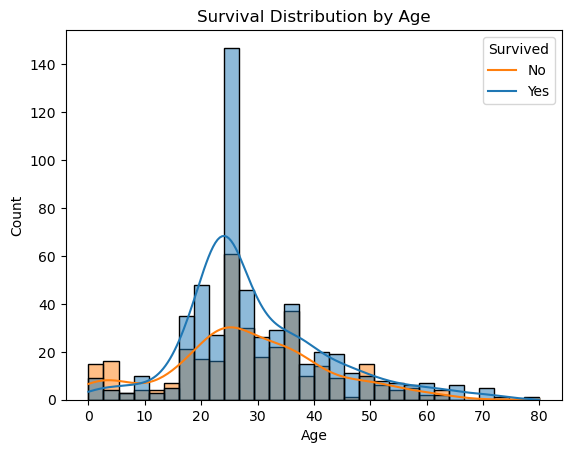

In [342]:
sns.histplot(data=df, x="Age", hue="Survived", kde=True, bins=30)
plt.title("Survival Distribution by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

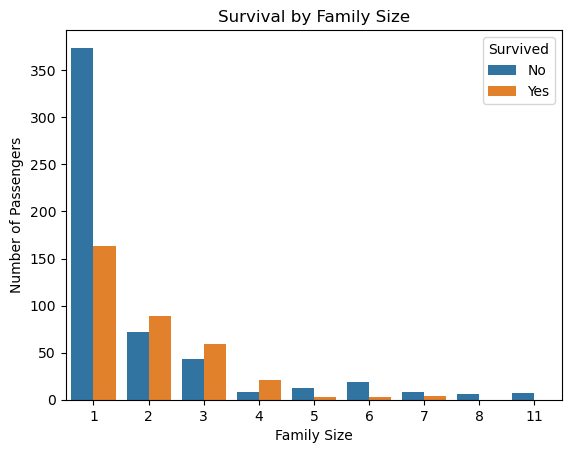

In [344]:
sns.countplot(data=df, x="fam_size", hue="Survived")
plt.title("Survival by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Number of Passengers")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

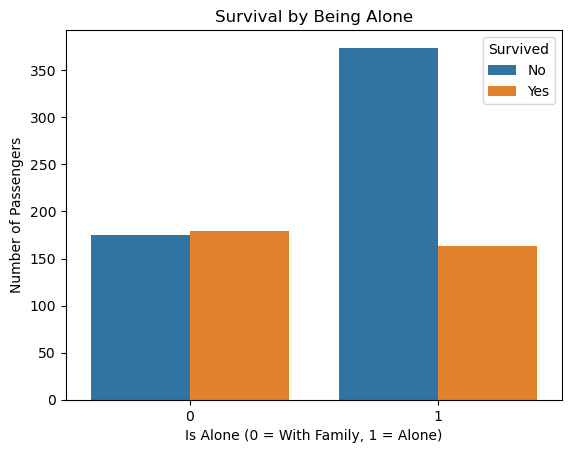

In [418]:
sns.countplot(data=df, x="is_alone", hue="Survived")
plt.title("Survival by Being Alone")
plt.xlabel("Is Alone (0 = With Family, 1 = Alone)")
plt.ylabel("Number of Passengers")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

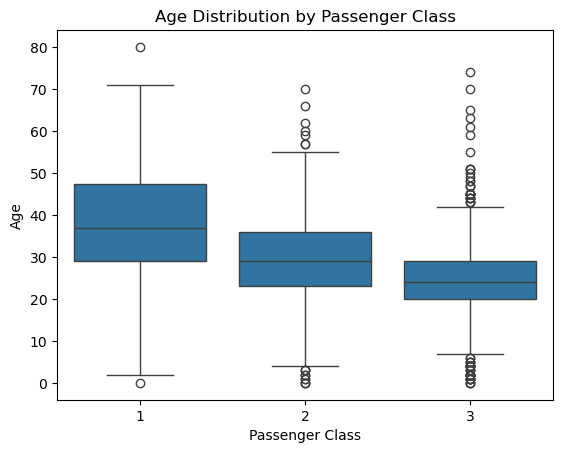

In [411]:
sns.boxplot(data=df, x='Pclass', y='Age')
plt.title("Age Distribution by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.show()

### Summary
In this exploratory data analysis (EDA), several key patterns related to passenger survival on the Titanic were discovered through visualizations. These insights help guide feature selection for machine learning models.

- **Sex**:
  Female passengers had a significantly higher survival rate compared to males.
- **Pclass (Passenger Class)**:
  First-class passengers had the highest survival rate, while third-class had the lowest.
  Additionally, the box plot revealed that first-class passengers tend to be older on average than those in second and third class.
- **Age**:
  Children, especially under 10 years old, showed a higher chance of survival. Most passengers were between 20 and 40.
- **Fare**:
  Passengers who paid higher fares were more likely to survive, possibly indicating access to better cabins or rescue priority.
- **Family Size**:
  Small families (2–4 members) had a higher survival rate. Those traveling alone were less likely to survive.
- **Is Alone**:
  Passengers traveling alone had a notably lower survival rate than those with companions.

----

# Models Machine Learning

### Train Test Split

In [348]:
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'fam_size', 'is_alone']]
y = df['Survived']

In [352]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

---

### LogisticRegression

In [354]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [356]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8097014925373134
[[138  19]
 [ 32  79]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       157
           1       0.81      0.71      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



---

### RandomForest

In [362]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred_rf = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7947761194029851
[[133  24]
 [ 31  80]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       157
           1       0.77      0.72      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.79      0.79      0.79       268



---

### XGBClassifier

In [364]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8171641791044776
[[136  21]
 [ 28  83]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       157
           1       0.80      0.75      0.77       111

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



/Users/naphatsuphasasin/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:42:14] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Summary

In this section, three machine learning models were trained to predict Titanic passenger survival:

- Logistic Regression
- Random Forest Classifier
- XGBoost Classifier

Three machine learning models were trained to predict passenger survival on the Titanic dataset. Among them, 
- ***XGBoost*** demonstrated the best performance with an accuracy of 82% and the highest F1-score of 0.77 for the "survived" class, indicating strong predictive power for identifying survivors. 
- ***Logistic Regression*** and ***Random Forest*** also performed well, with accuracies of approximately 81% and 79%, respectively, but showed slightly lower precision and recall on the positive class.
- Based on these results, ***XGBoost*** was selected as the final model due to its superior overall performance.